In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from macrosim.SeriesAccessor import SeriesAccessor
from macrosim.EqSearch import EqSearch

import corner

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
fred= SeriesAccessor(key_path='./fred_key.env', key_name='fred_key')

In [3]:
start = dt.datetime.fromisoformat("2000-01-01")
end = dt.datetime.fromisoformat("2024-01-01")

In [4]:
df = fred.get_series(series_ids=['NETEXP', 'CIVPART','LES1252881600Q', 'SPPOPGROWUSA', 'CORESTICKM159SFRBATL', 'GDPC1'], date_range=(start, end), reindex_freq='QS')

In [5]:
df = fred.fill(
    df,
    [ *[None]*3, 'ffill' ]
)
df

,NETEXP,CIVPART,LES1252881600Q,SPPOPGROWUSA,CORESTICKM159SFRBATL,GDPC1
2000-01-01,-356.583,67.3,334.0,1.112769,2.335519,13878.147
2000-04-01,-362.501,67.3,334.0,1.112769,2.409239,14130.908
2000-07-01,-393.867,66.9,335.0,1.112769,2.712970,14145.312
2000-10-01,-411.343,66.8,334.0,1.112769,2.919941,14229.765
2001-01-01,-402.653,67.2,333.0,0.989741,2.878468,14183.120
...,...,...,...,...,...,...
2023-01-01,-813.648,62.4,364.0,0.491925,6.488339,22403.435
2023-04-01,-803.479,62.6,365.0,0.491925,6.267738,22539.418
2023-07-01,-781.091,62.6,366.0,0.491925,5.402919,22780.933
2023-10-01,-791.152,62.7,370.0,0.491925,4.882717,22960.600


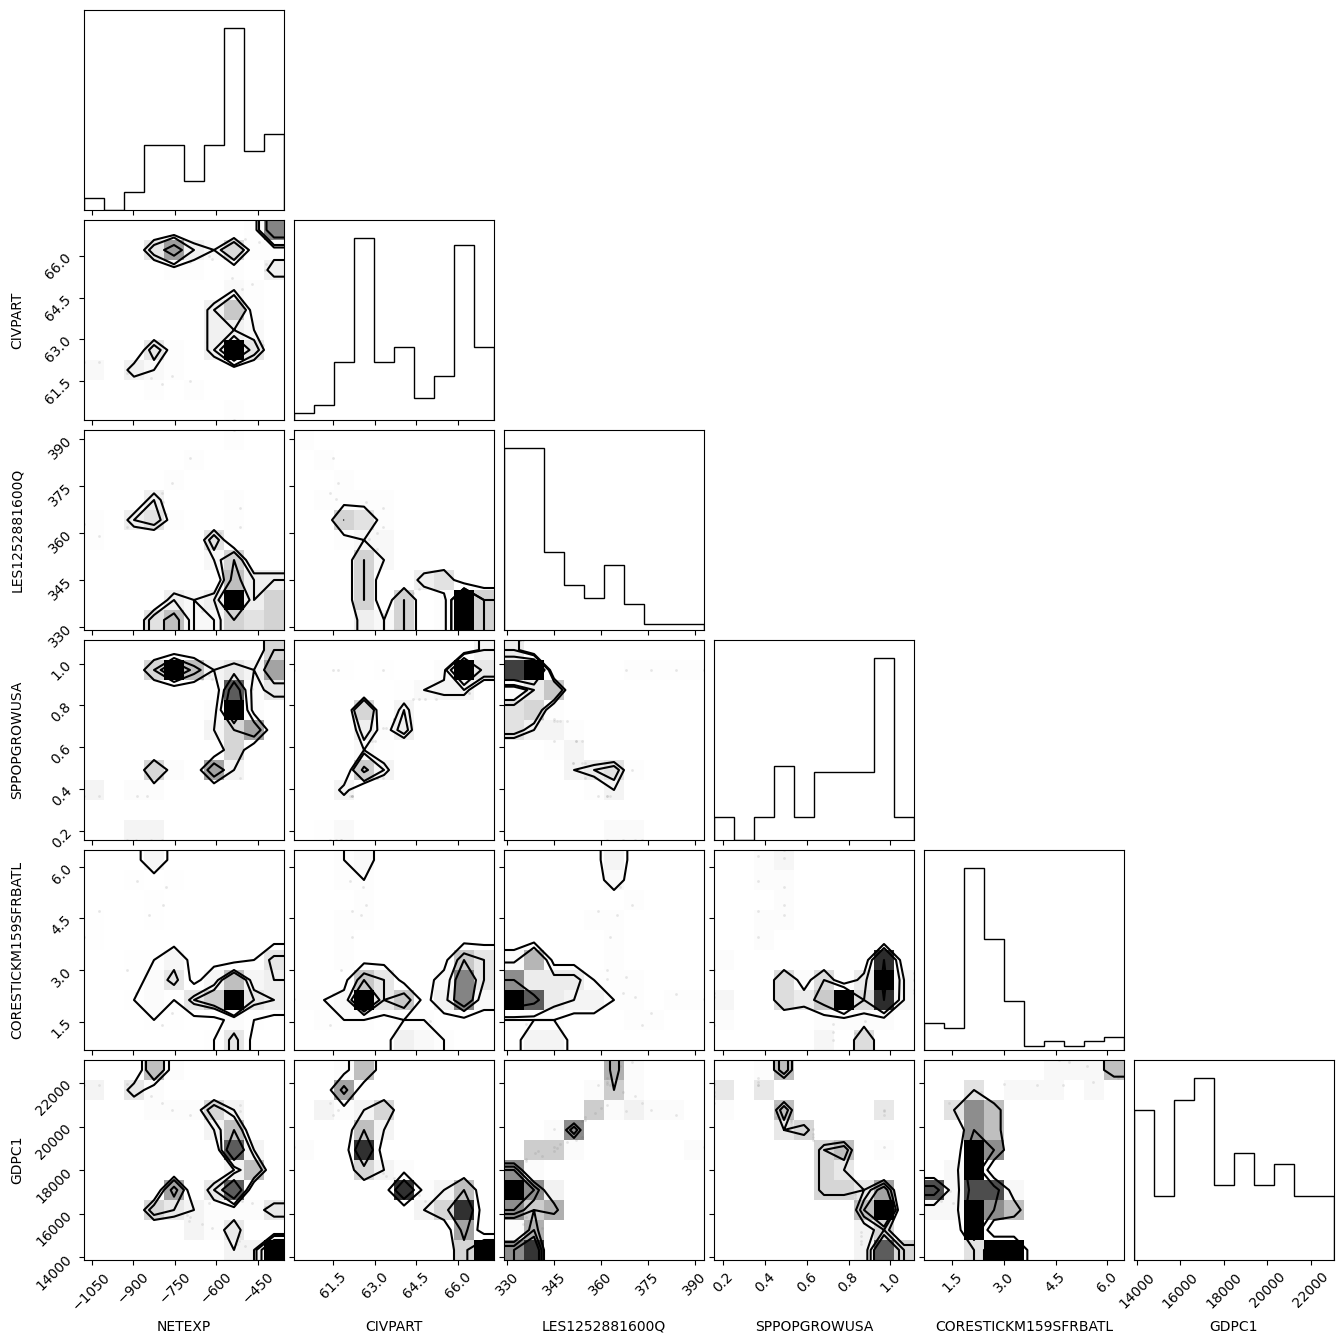

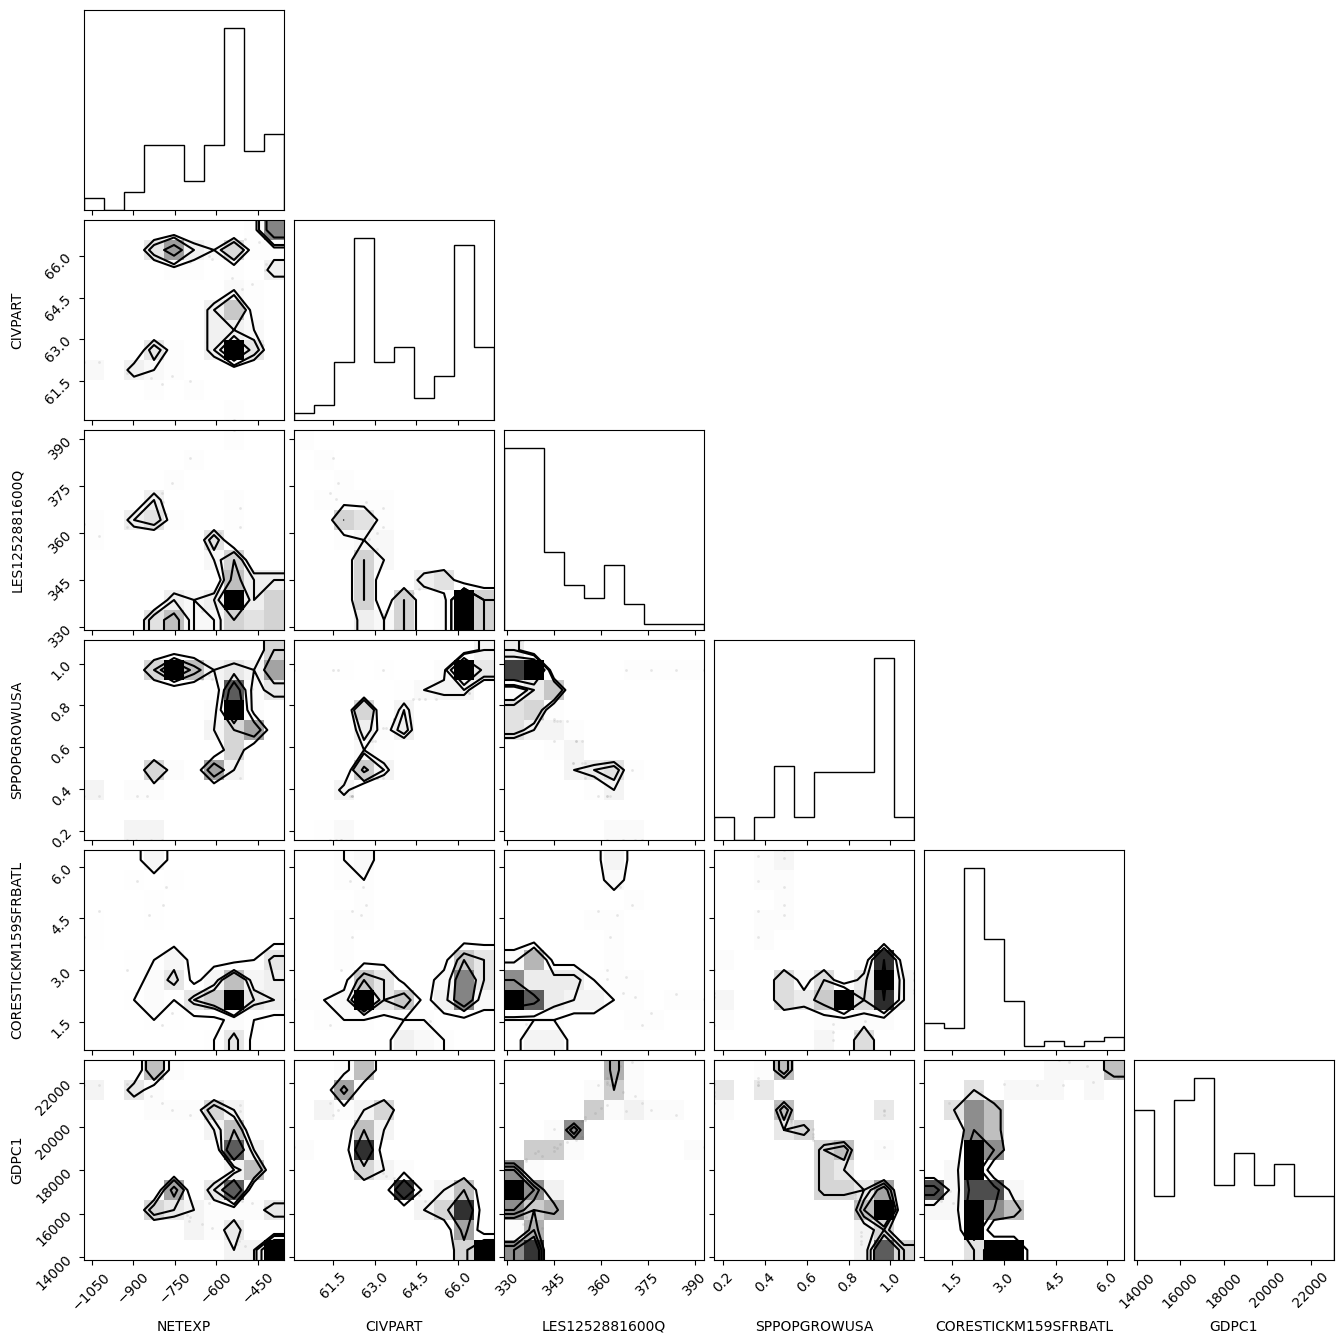

In [6]:
corner.corner(df, labels=df.columns, bins=10)

In [7]:
eqsrc = EqSearch(
    X=df.drop(columns=['GDPC1']),
    y=df['GDPC1']
)

In [8]:
eqsrc.distil_split()

RandomForest Score at Distillation: 0.9612313410355852


In [9]:
eqsrc.search()

Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
/opt/miniconda3/envs/MacroSim/lib/python3.12/site-packages/pysr/sr.py:87: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.230e+05
Progress: 2694 / 9300 total iterations (28.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.188e+06  1.594e+01  y = 17907
3           2.870e+06  3.841e-01  y = LES1252881600Q ^ 1.6764
5           1.110e+06  4.748e-01  y = 98509 - (CIVPART * 1253.6)
7           7.545e+05  1.933e-01  y = 83921 - ((CIVPART - CORESTICKM159SFRBATL) * 1070.1)
8           6.360e+05  1.708e-01  y = 1.0162e+05 - ((sin(CORESTICKM159SFRBATL) + CIVPART) * ...
                                      1291.9)
9           4.395e+05  3.696e-01  y = 87311 - ((CIVPART * 1105) + (NETEXP * CORESTICKM159SFR...
                                      BATL))
11          3.972e+05  5.055e-02  y = 88532 - ((CIVPART * 1116.1) + (CORESTICKM159SFRBATL * ...
                      

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 6.360e+05
Progress: 8191 / 9300 total iterations (88.075%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.188e+06  1.594e+01  y = 17907
3           2.870e+06  3.841e-01  y = LES1252881600Q ^ 1.6764
4           2.870e+06  -0.000e+00  y = sqrt(LES1252881600Q ^ 3.3528)
5           1.110e+06  9.496e-01  y = 98509 - (CIVPART * 1253.6)
7           7.545e+05  1.933e-01  y = 83920 - ((CIVPART - CORESTICKM159SFRBATL) * 1070)
8           6.360e+05  1.708e-01  y = 1.0162e+05 - ((CIVPART + sin(CORESTICKM159SFRBATL)) * ...
                                      1291.8)
9           4.395e+05  3.696e-01  y = 87310 - ((CIVPART * 1105) + (CORESTICKM159SFRBATL * NE...
                                      TEXP))
11          3.972e+05  5.055e-02  y = 88531 - ((COR

In [10]:
act = df['GDPC1']
pred = pd.Series(eqsrc.eq(df.drop(columns=['GDPC1'])), index=df.index)

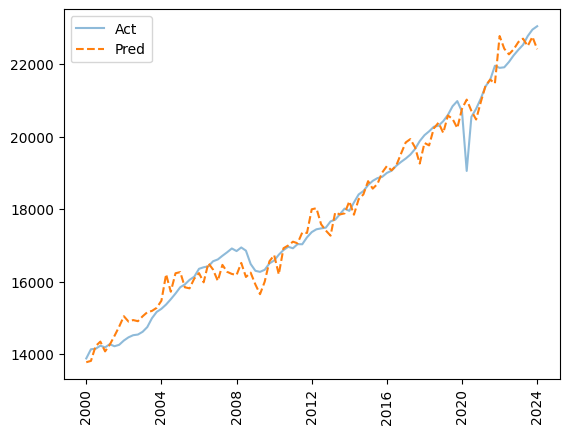

In [11]:
plt.plot(act, label='Act', alpha=0.5)
plt.plot(pred, label='Pred', linestyle='--')

plt.xticks(rotation=90)

plt.legend()
plt.show()

In [12]:
eqsrc.eq

PySRFunction(X=>(LES1252881600Q - 130.33737)*(CIVPART*(-1.3052098) + CORESTICKM159SFRBATL + cos(CIVPART + CIVPART) + 153.28793) + (LES1252881600Q*cos(CIVPART - sin(SPPOPGROWUSA**3.9322524)) - NETEXP)*3.6706016)